In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [2]:
df = pd.read_csv("singindex_computing_data.csv", index_col=0)
metadf = pd.read_csv("singindex_computing_metadata.csv")

In [3]:
df.describe()

,IBM revenue worldwide on cloud and cognitive software segment in billion USD,Global PC penetration per capita from 2000 to 2015 (in percentage),Cloud system management software revenue worldwide from 2010 to 2015 (in millions USD),Global cloud infrastructure service spend ( USD billion) Visual estimate,Forecast total quantum computer revenue (Million USD) (visual estimate),Estimate quantum computing marketsize (million USD) visual estimate,Forecast sales of notebook 2021 to 2025 (Million units),Information technology (IT) spending on enterprise software worldwide from 2009 to 2022 (billion USD),Market of SaaS industry (in billion USD) forcast 2018-2020,Number of deals in quantum computing by quantum technology firms from private investors,...,Cloud computing traffic forecast (EB per year),Max computer RAM capacity over years (in MB),USD per GB of DRAM over years (visual estimation),Seagate's average capacity of hard disk drives (HDDs) worldwide over years (TB),USD per TB of Enterprise SSD thorugh years (visual estimate),Unadjusted Consumer Price Index for computer software and accessories expenditure in the U.S. from 2003 to 2017 (CPI-W),Share of household with a computer at home worldwide from 2005 to 2009 (percentage),Publications with the word 'quantum computing' in full text search worldwide,Publications with the word 'process computing' in full text search worldwide,Publications with the word 'cloud computing' in full text search worldwide
count,3.000000,16.000000,10.000000,2.000000,7.000000,8.000000,5.000000,14.000000,13.000000,7.000000,...,5.00000,13.000000,6.000000e+00,7.000000,7.000000,15.000000,15.000000,9.000000,9.000000,9.000000
mean,22.826667,8.500000,3006.060000,119.500000,807.142857,1289.250000,266.400000,380.653571,67.366154,3.571429,...,3317.20000,2827.692308,3.486517e+05,7.114286,992.857143,45.352667,39.420000,38171.888889,305710.666667,75613.444444
std,0.587566,4.289522,2236.015819,23.334524,725.389879,657.535605,4.711157,138.082614,52.056744,3.457222,...,870.78166,2886.887349,8.097844e+05,7.553460,636.676639,9.956466,6.835642,9606.796740,75735.025807,27282.714359
min,22.210000,3.000000,409.000000,103.000000,250.000000,600.000000,261.800000,225.510000,5.560000,0.000000,...,2218.00000,64.000000,1.000000e+01,1.000000,400.000000,31.660000,27.300000,26433.000000,208594.000000,36487.000000
25%,22.550000,5.000000,1356.525000,111.250000,275.000000,787.500000,262.800000,288.000000,21.210000,1.500000,...,2768.00000,512.000000,3.250000e+02,1.450000,550.000000,36.365000,34.300000,30844.000000,256378.000000,56986.000000
50%,22.890000,7.500000,2572.850000,119.500000,500.000000,1100.000000,265.600000,318.000000,63.190000,2.000000,...,3318.00000,2000.000000,8.500000e+02,1.900000,900.000000,43.350000,41.100000,35526.000000,277207.000000,75343.000000
75%,23.135000,11.250000,4024.250000,127.750000,1075.000000,1625.000000,268.300000,462.500000,106.000000,5.000000,...,3853.00000,4000.000000,6.775000e+04,12.400000,1150.000000,51.145000,45.300000,43336.000000,354419.000000,91234.000000
max,23.380000,17.000000,7442.900000,136.000000,2200.000000,2464.000000,273.500000,669.000000,157.000000,10.000000,...,4429.00000,8000.000000,2.000000e+06,19.200000,2250.000000,63.300000,47.100000,56904.000000,446721.000000,124610.000000


## Pre-processing

### Build index components

In [4]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [5]:
df[index_comps].to_csv("singindex_computing_raw_components.csv")
df_index.to_csv("singindex_computing_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_computing_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [6]:
from scipy import interpolate

In [25]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=1)

<AxesSubplot:xlabel='Year '>

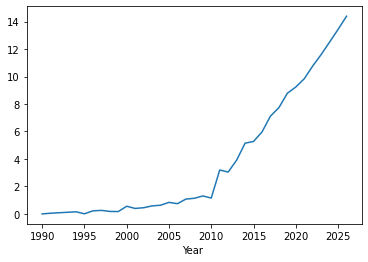

In [26]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [30]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(singindex_historic.index, singindex_historic.values, fill_value="extrapolate")

<AxesSubplot:>

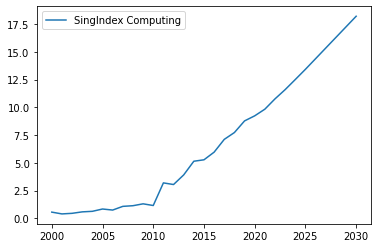

In [31]:
singindex = pd.DataFrame({"SingIndex Computing": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [32]:
singindex

,SingIndex Computing
2000,0.559524
2001,0.398382
2002,0.451522
2003,0.583038
2004,0.632310
2005,0.840251
2006,0.745778
2007,1.078927
2008,1.138440
2009,1.306977


### Export

In [33]:
df_interp_index.to_csv("singindex_computing_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_computing_avg_interpolate.csv")
singindex.to_csv("singindex_computing_avg_extrapolate_2000_2030.csv")